In [234]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [235]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [236]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [237]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [238]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [239]:
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

In [240]:
X[:, 1]

array([0, 2, 0, ..., 0, 1, 0], dtype=object)

In [241]:
labelencoder_X_2 = LabelEncoder()

In [242]:
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [243]:
X[:,2]

array([0, 0, 0, ..., 0, 1, 0], dtype=object)

In [244]:
onehotencoder = OneHotEncoder(categorical_features = [1])

In [245]:
X = onehotencoder.fit_transform(X).toarray()

In [246]:
X = X[:, 1:]

In [247]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [248]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [264]:

n_cols = X_train.shape[1]
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(10, init = 'uniform', activation = 'relu', input_shape = (n_cols,)))

# Adding the second hidden layer
classifier.add(Dense(20, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\ivo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", input_shape=(11,), kernel_initializer="uniform")`
  import sys
C:\Users\ivo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ivo\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  del sys.path[0]


In [265]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 150)

C:\Users\ivo\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/150
8000/8000 [==============================] - 1s 160us/step - loss: 0.4649 - acc: 0.7959
Epoch 2/150
8000/8000 [==============================] - 1s 109us/step - loss: 0.4200 - acc: 0.8155
Epoch 3/150
8000/8000 [==============================] - 1s 112us/step - loss: 0.4135 - acc: 0.8315
Epoch 4/150
8000/8000 [==============================] - 1s 116us/step - loss: 0.4090 - acc: 0.8310
Epoch 5/150
8000/8000 [==============================] - 1s 122us/step - loss: 0.4062 - acc: 0.8340
Epoch 6/150
8000/8000 [==============================] - 1s 112us/step - loss: 0.4029 - acc: 0.8337
Epoch 7/150
8000/8000 [==============================] - 1s 135us/step - loss: 0.4027 - acc: 0.8345
Epoch 8/150
8000/8000 [==============================] - 1s 164us/step - loss: 0.4010 - acc: 0.8345
Epoch 9/150
8000/8000 [==============================] - 1s 154us/step - loss: 0.3998 - acc: 0.8356
Epoch 10/150
8000/8000 [==============================] - 1s 158us/step - loss: 0.3992 - acc: 0.8341

In [266]:
y_pred = classifier.predict(X_test)

In [267]:
y_pred = (y_pred > 0.5)

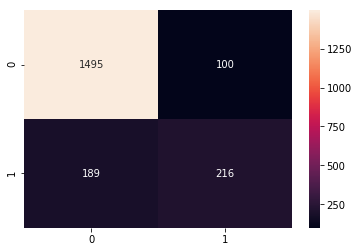

In [268]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [269]:
scores = classifier.evaluate(X_test,y_test)
print("\n%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

2000/2000 [==============================] - 0s 79us/step

acc: 85.55%
